# <center>Convolutional Neural Networks</center>
<img src="mnist.png" width="200px">
In this lesson we will use the MNIST dataset of handwritten numbers, which is a standard dataset used in academia.  We will learn how to design, code, and test a Convolutional Neural Networks (CNNs) using Tensorflow and Keras packages.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

### Deciding on CNN layers and hyperparameters
#### First Layer
For the input layer that will take in the image, we need to decide on the following:
* Kernel Size 
* Number of Kernels
* Activation Function

It's hard to decide with a rule of thumb on how to choose these.  In our case, we have rectangular images as inputs, so we want a square shaped kernel.  Usually, you want the side of the kernel to be an odd number so that there is a middle value.  For example, by choosing the side size of 3, we get a 3x3 kernel, and there is a middle value at the center of the 3x3 kernel.  

Our image is size 28x28.  So we don't want a large kernel.  Let's choose a **5x5**.  This is just a good guess to start with.    

For number of Kernels, let's choose **50** as an initial starting point.  This is just an initial guess and we can optimize it later.

Finally, let's choose **Rectified Linear Unit (ReLU)** activation function.  This worked well in the last lesson, so we'll try using it here.  

After this, let's choose a **2x2 Maxpool** (pooling layer where we choose the maximum value in each 2x2 grid) layer with a **stride of 2**.  This way we cover all the pixels.   

#### Second Layer

In the first layer, the 28x28 input after convolution with a 5x5 filter results in a 24x24 image from each neuron (removing edges).  Then the pooling layer will decrease that size to 12x12 for the output of each neuron in the first layer.  In this 2nd layer, since this is a smaller image, let's make the kernel smaller to **3x3**.  Generally you would choose a smaller secondary layer than the first, so let's choose 25 neurons in this layer.  We'll keep the pooling layer parameters from before (**2x2 Maxpool, Stride=2**).  The output of the 2nd convolutional layer will be a 10x10 image from each neuron, and then the pooling layer will reduce this to 5x5 from each neuron.   

#### Flattening Layer
The output of the 2nd layer will be 5x5 for 25 neurons.  But for our final output, we want it as 1D so that it can be used to output class probabilities.  So we use a flattening layer.  The 5x5x25 output of the 2nd layer will be flattened to a 1D layer of 625.  

#### Output Layer
Send the output of the Flattening layer to a final dense layer of 10 neurons, one for each class corresponding to the handwritten numbers 0 to 9.  Let's choose **Softmax** as the output layer activation function to get probabilities for each class output neuron.  

The figure below shows the overall architecture:

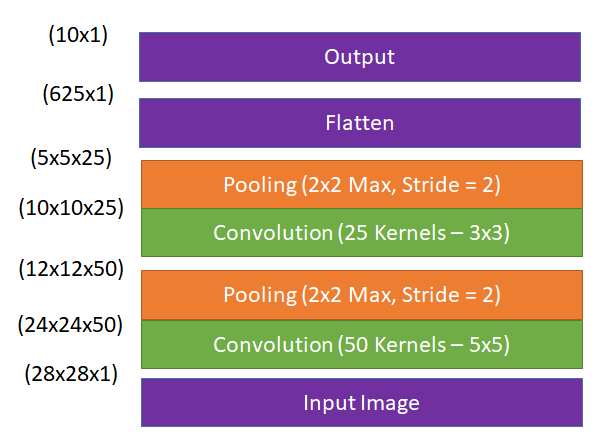

### Load Data and Preprocessing
The MNIST dataset is already pre-processed in that there are no missing values and outliers are accounted for.  
More information can be found here: https://www.tensorflow.org/datasets/catalog/mnist
We have the **tensorflow** package from the previous lesson.  

Use the following code in your Anaconda command window to install an additional package.  **pip install tensorflow_datasets**

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
# Optional: Define constants here
Num_Epochs = 20

In [4]:
#data, info = tfds.load(name='mnist',with_info=True,as_supervised=True)
# with_info returns information about the dataset
# as_supervised returns class labels - i.e. what is the actual number that the image represents


In [5]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [7]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

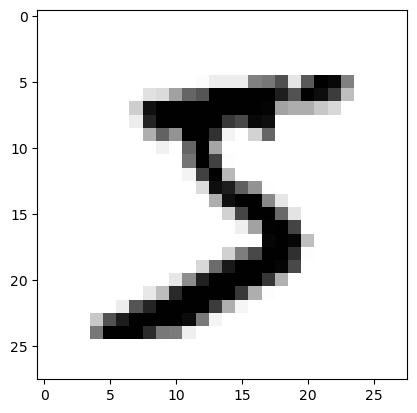

In [6]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [7]:
# One-hot encoding for 10-class problem
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(y_train[0:5,:])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
# first layer
model.add(Conv2D(50,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid')) # padding='valid' means don't add any padding to the image
# second layer
model.add(Conv2D(25,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
# flatten layer
model.add(Flatten())
# Output layer
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy')
model.fit(x = X_train, y=y_train,epochs=Num_Epochs, validation_data=(X_test,y_test))
# FYI - training happens in batches, with default batch size set to 32.  There are 60,000 training 
#       observations, so 60000/32 = 1875 batches.  That's what's shown in the progress bar below.

Epoch 1/20
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3489 - val_loss: 0.1112
Epoch 2/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0926 - val_loss: 0.0622
Epoch 3/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0751 - val_loss: 0.0837
Epoch 4/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0649 - val_loss: 0.0657
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0590 - val_loss: 0.0596
Epoch 6/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0497 - val_loss: 0.0662
Epoch 7/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0500 - val_loss: 0.0650
Epoch 8/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0462 - val_loss: 0.0521
Epoch 9/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0437 - val_loss: 0.0655
Epoch 10/20
1875/1875 [==============================] - 35s 19m

<AxesSubplot:>

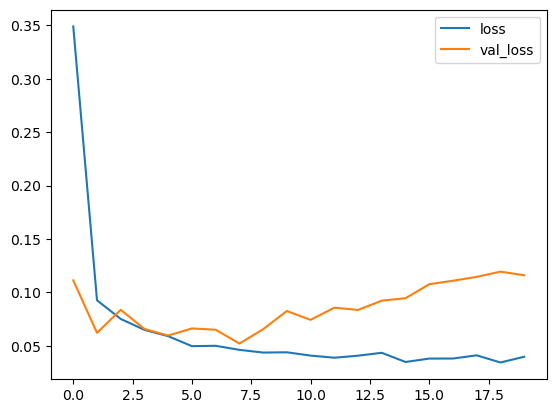

In [11]:
loss = pd.DataFrame(model.history.history)
loss.plot()

### Optimize model
Let's try some dropout layers and early stopping like from lesson 1

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2) #lower number of "patience" because training take so long

In [13]:
from tensorflow.keras.layers import Dropout

In [15]:
model = Sequential()
# first layer
model.add(Conv2D(50,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid')) # padding='valid' means don't add any padding to the image
model.add(Dropout(0.5))
# second layer
model.add(Conv2D(25,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Dropout(0.5))
# flatten layer
model.add(Flatten())
# Output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy')
model.fit(x = X_train, y=y_train,epochs=Num_Epochs,validation_data=(X_test,y_test),callbacks=[earlyStop])


Epoch 1/20
1875/1875 [==============================] - 46s 24ms/step - loss: 1.4230 - val_loss: 0.1619
Epoch 2/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3178 - val_loss: 0.1080
Epoch 3/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2425 - val_loss: 0.0809
Epoch 4/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2020 - val_loss: 0.0701
Epoch 5/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1875 - val_loss: 0.0682
Epoch 6/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1853 - val_loss: 0.0630
Epoch 7/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1743 - val_loss: 0.0684
Epoch 8/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1722 - val_loss: 0.0691
Epoch 8: early stopping


<AxesSubplot:>

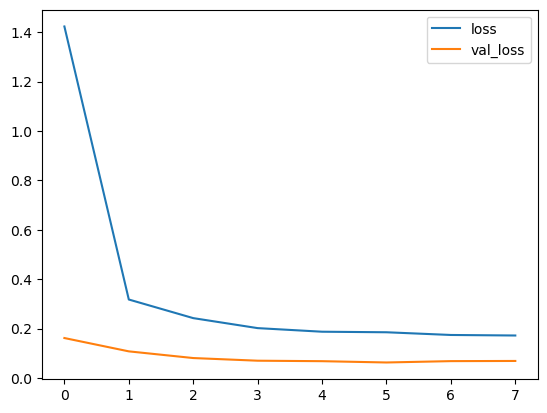

In [16]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [17]:
ypred = model.predict(X_test)
ypred.shape

313/313 [==============================] - 4s 6ms/step


(10000, 10)

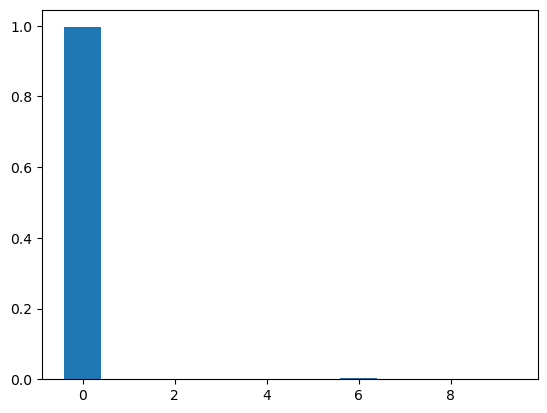

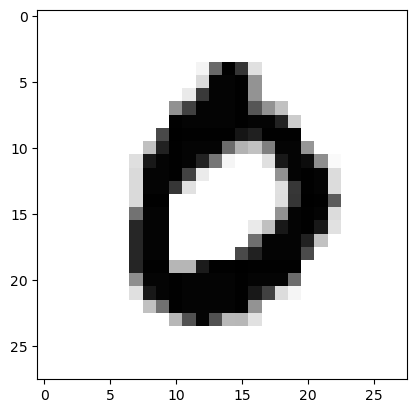

In [18]:
plt.bar(x=range(10),height=ypred[3,:])
plt.show()
plt.imshow(X_test[3], cmap='binary')
plt.show()

In [19]:
# Find the difficult cases
np.where(np.max(ypred, axis=1)<0.55)

(array([  92,  230,  282,  290,  324,  381,  578,  582,  659,  726,  882,
        1206, 1226, 1281, 1283, 1319, 1326, 1328, 1394, 1500, 1522, 1527,
        1530, 1581, 1901, 1903, 1952, 1956, 1969, 2018, 2109, 2129, 2148,
        2151, 2293, 2298, 2325, 2406, 2597, 2760, 2780, 2836, 2921, 2930,
        2938, 2945, 3012, 3060, 3117, 3225, 3329, 3533, 3534, 3558, 3599,
        3629, 3681, 3718, 3726, 3730, 3749, 3762, 3778, 3796, 3838, 3853,
        3869, 3971, 3976, 3995, 4152, 4289, 4369, 4393, 4783, 4807, 4823,
        4874, 4956, 5067, 5140, 5201, 5642, 5749, 5888, 5973, 6035, 6091,
        6173, 6495, 6560, 6568, 6571, 6577, 6625, 6651, 6740, 6769, 6847,
        7309, 7354, 7426, 7434, 7539, 7595, 7847, 7856, 7899, 7900, 7902,
        7915, 7928, 8091, 8095, 8107, 8128, 8255, 8279, 8607, 8735, 9015,
        9036, 9071, 9620, 9634, 9677, 9679, 9698, 9700, 9716, 9742, 9762,
        9879, 9905, 9922, 9925, 9975], dtype=int64),)

<BarContainer object of 10 artists>

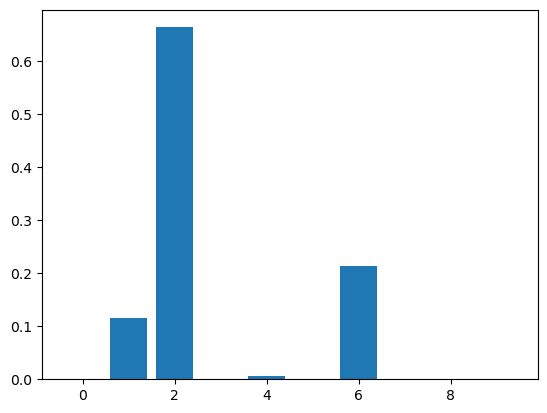

In [20]:
plt.bar(x=range(10),height=ypred[646,:]) # 20

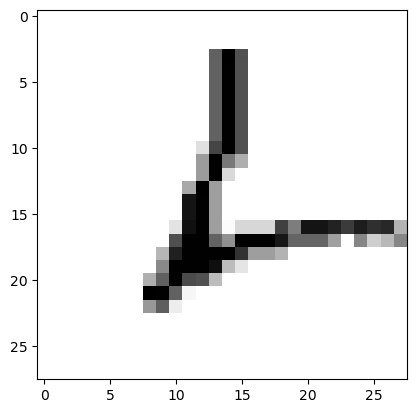

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
plt.imshow(X_test[646], cmap='binary')
plt.show()
print(y_test[646]) # supposed to be a 2

In [22]:
sum(ypred[646,:])

0.9999999595491289